# Importing Libraries

import pandas as pd 
import numpy as np 


In [2]:
#Loading the datset
df=pd.read_csv("Fraud.csv")

In [3]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

### Data Cleaning: The first step in this process is to clean the data, including checking for missing values, imputing them where necessary, detecting and treating outliers, and checking for multi-collinearity. This ensures that the data is suitable for analysis and prevents any potential biases or inaccuracies in the results.

In [6]:
df.shape


(6362620, 11)

In [7]:
from pandas_profiling import ProfileReport

In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### With the help of pandas_profiling we have explore the data set in which we have founded many relations between data, missing values, multi-colinearity . Now we have to deal with it 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:xlabel='amount'>

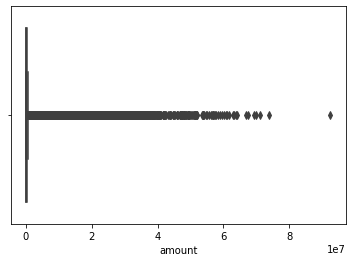

In [12]:
sns.boxplot(x=df['amount'])

C:\Users\Ast_Rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


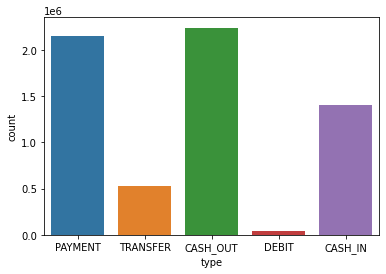

In [13]:
sns.countplot(df['type']);

In [14]:
print("Total Unique Values in nameOrig", df['nameOrig'].nunique())

Total Unique Values in nameOrig 6353307


In [15]:
print("Total Unique Values in nameDest", df['nameDest'].nunique())

Total Unique Values in nameDest 2722362


#### Observations:- 

1.Amount Column has Outliers

2.Debit type transaction count is very small

3.Total Unique values in nameOrig is 6353307

4.Total Unique values in nameDest is 2722362

In [16]:
objlst=df.select_dtypes(include='object').columns

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_without_text=pd.DataFrame({"step":df.step,
                                "amount":df.amount,
                               "oldbalanceOrg":df.oldbalanceOrg,
                               "newbalanceOrig":df.newbalanceOrig,
                               "oldbalanceDest":df.oldbalanceDest,
                               "newbalanceDest":df.newbalanceDest,
                               "isFraud":df.isFraud,
                               "isFlaggedFraud":df.isFlaggedFraud})

In [18]:
vif_df=pd.DataFrame()

In [19]:
vif_df['feature']=df_without_text.columns

In [20]:
vif_df["VIF"] = [variance_inflation_factor(df_without_text.values, i)
                          for i in range(len(df_without_text.columns))]

In [21]:
vif_df

feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546

In [22]:
objlst

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

### Label Encoding

THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [23]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for feat in objlst:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [25]:
df.head()

step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0

## Now again Doing for Multicolinearty

In [26]:

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [27]:
calc_vif(df)

variables         VIF
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


Issue:

1.Here oldbalanceorg and newbalanceorig has high vif so these are creating multi-collinearity

2.oldbalanceDest and newbalanceDest also has multi-collinearity.

In [28]:
## Now combine these and drop the individual 

df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

In [29]:
#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

In [30]:
calc_vif(df)

variables       VIF
0                type  2.687803
1              amount  3.818902
2             isFraud  1.184479
3      isFlaggedFraud  1.002546
4  Actual_amount_orig  1.307910
5  Actual_amount_dest  3.754335
6     TransactionPath  2.677167

<AxesSubplot:>

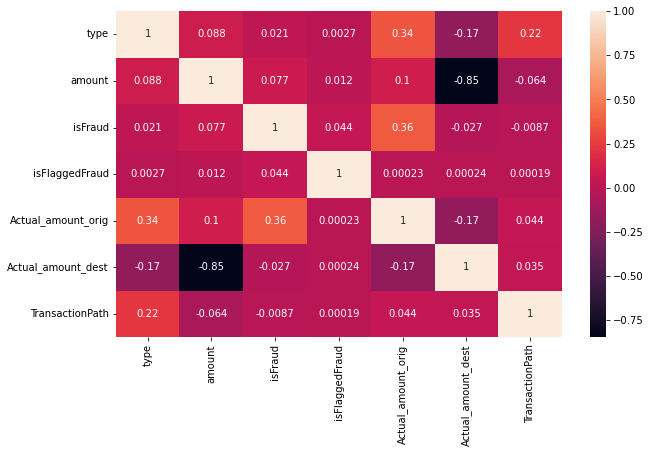

In [31]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Importing Library for Model Building

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [35]:
# Train Test split Method
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [38]:
# Training Model 

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [43]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [44]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92309247867493
Random Forest Score:  99.95876960539316


# Conclusion 

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, 

Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.


Data Cleaning: The first step in this process is to clean the data, including checking for missing values, imputing them where necessary, detecting and treating outliers, and checking for multi-collinearity. This ensures that the data is suitable for analysis and prevents any potential biases or inaccuracies in the results.

Fraud Detection Model: The next step is to build a machine learning model to classify transactions as fraudulent or not fraudulent. This can be achieved using algorithms such as Random Forest and Decision Tree and Xgboost. These models work by learning the relationship between the input features and the target variable through training on a labeled dataset. The model can then be used to make predictions on new, unseen data.

Variable Selection: The variables to be included in the model can be selected based on their correlation with the target variable and their relevance to the problem. This can be done using feature importance measures provided by the machine learning algorithms or by using feature selection techniques such as Recursive Feature Elimination or Feature Selection using Mutual Information.

Model Performance: The performance of the model can be evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Cross-validation can also be used to ensure that the model generalizes well to new, unseen data.

Key Factors Predicting Fraud: The key factors that predict fraudulent customers can be determined by analyzing the feature importances provided by the machine learning model. These may include variables such as transaction type, transaction amount, and changes in balance before and after the transaction.

Factor Interpretation: The factors that predict fraudulent behavior make sense, as they represent potential indicators of fraudulent activity. For example, a large transaction amount may indicate a fraudulent transfer of funds, while a large change in balance may indicate that funds were taken from or added to an account.

Prevention: To prevent fraud, a company can adopt several measures such as implementing stronger authentication procedures, monitoring transactions for suspicious behavior, and implementing real-time alerts for potential fraud. They can also use machine learning models to identify potential fraud and flag transactions for manual review.

Evaluating Prevention Measures: To determine if the prevention measures have been effective, the company can monitor the number of fraudulent transactions and compare it to previous periods. They can also evaluate the accuracy and precision of their fraud detection model and make adjustments as necessary. Additionally, customer feedback and complaints can also provide valuable insights into the effectiveness of the prevention measures.

Overall, the goal of the proactive detection of fraud is to identify and prevent fraudulent activity in a timely and effective manner, while minimizing the risk of false positives and false negatives. By following these steps, a company can build an effective fraud detection system that can help them protect their customers and their business.